## PRCP-1000-PortugeseBank

**Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task 3:-Suggestions to the Bank market team to make  customers  buy the product

### Summary of the project 

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank-additional-full.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
pd.set_option("display.max_columns",None)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes



## Domain Analysis

1. **Age** : Its the Age of the customers.
2. **Job** : Type of job the the customers are doing.
3. **Marital** : Marital status if they are Single, Married, Divorced or Widowed.
4. **Education** : The Degree the have.
5. **Default** : Has credit in default ?
6. **Housing** : Has housing loan ?
7. **Loan** : Has personal loan ?
8. **Contact** : Communication type.
9. **Month** : Last contact month of year.
10. **Day_of_week** : Day of week.
11. **Duration** : Last contact duration / time in seconds.
12. **Campaign** : Number of contacts performed during this campaign and for this client.
13. **Pdays** : Number of days passed after the client was last contacted.
14. **Previous**: Number of contacts performed during this campaign and this client.
15. **Poutcome** : Outcome of the previous marketing campaign.
16. **emp.var.rate** : employment variation rate - quarterly indicator.
17. **cons.price.idx** : consumer price index - monthly indicator.
18. **cons.conf.idx** : consumer confidence index - monthly indicator 
19. **euribor3m** : euribor 3 month rate - daily indicator 
20. **nr.employed** : number of employees - quarterly indicator.
21. **Y** : Has the client done the term deposit ?

In [4]:
pd.set_option("display.max_columns",None)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Basic Checks 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.describe(include='O').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [8]:
num_col=data.select_dtypes(include=['int64','float64'])
num_col

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [9]:
cat_col=data.select_dtypes(include=['object'])
cat_col

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
len(data)

41188

In [14]:
data.shape

(41188, 21)

# Task 1:-Prepare a complete data analysis report on the given data.


## Exploratory Data Analysis [EDA]


### Univariate Anaylsis 

In [15]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Insights

 **Age** 
 - It's a numerical feature.About 90% of data lies between the age group of 25-60. Here avg age is 40.9 years & median age is 39. Here skewness is 0.685 & kurtosis is 0.320. It lies within the permissible range so it is normally distributed.
     
 **Job**
   - Its a categorical feature having 12 distict labels like "admin","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician" "unemployed" "Unknown". Out of which 70% of data belongs to 4 categories only ie admin, bluecollar, technician,management.

 **Marital**
  - Marital status is a categorical feature having 3 distinct features "married","divorced","single". 60% are married, 28% are single, 12% are divorced.

 **Education**
  - It's a categorical feature having 4 distinct features like "Secondary","Tertiary","primary","unknown". 51% of data belongs to the Secondary , 29% belongs to Tertiary, 15% are Primary class.
  
 **Default**
  - Credit default means a debt default happens when a borrower fails to pay his or her loan at the time it is due. More than 98% of data shows no credit default.
    
 **Balance**
  - It's a numerical feature.About 80% of data shows 0k balance. Here skewness is 8.36 & kurtosis is 141.which clearly explains high positive skewness.

   
 **Housing**
  - Its a categorical feature shows whether the person has availed a housing loan or not. It has 2 distict labels i.e yes,no. 56% participants have availed a housing loan whereas 44% did not avail a housing loan.
    
 **Loan**
  - Its a catagorical feature detailing whether the client has availed a personal loan or not. It has 2 distinct labels yes,no. 84% have no personal loan and the rest 16% have a personal loan.
    
 **Contact** 
  - It shows contact communication type. 65% shows cellular contact type whereas 6% contacted through telephone and 29% Unknown.
    
 **Day**
  - Shows last contact day  (numerical: it shows date only 1-31).15% data shows last contact day lies between 18-23.median is 16

 **Month**
  - Shows last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec"). 30% of the contacts were made during the month from May.

 **Duration**
   - It shows last contact duration in seconds.It's a numerical feature. About 80% calls have call duration of less than 500 seconds. 95% of calls have duration less than 751 seconds. It has kurtosis 18.2 & skewness 3.14 which clearly explains high positive skewness and kurtosis.

**Campaign**
  - Its a numerical feature showing the number of contacts performed during this campaign for a client. 81.3% clients are contacted less than 3 times. The kurtosis is 39.2 and skewness is 4.90 clearly showing the distribution is not normal.
    
 **Pdays**
  - Its a numerical feature detailing the number of days that passed by after the client was last contacted from a previous campaign. 81.7% times the client was not previously contacted. The kurtosis is 6.94 and skewness is 2.62.

 **Previous**
  - It means number of contacts performed before this campaign for a specific client. It's a catagorical feature which shows 95% of the clients were not contacted before this campaign.

 **Poutcome**
  - It shows outcome of previous marketing campaign. Its a categorical feature set having 4 unique labels like"failure","unknown","success","Other". 82% of the outcomes are "Unknown". 11% shows failure outcome and 3% shows successful outcome and 4%  shows Other.
     
 **Y**
  - It is our target variable that shows if the client subscribed a term deposit or not. It's a categorical feature having binary labels - "yes" or "no". It shows 88% of the clients have not subscribed the term deposit and the rest 12% had subscribed the term deposit.Y*







































### Bivariate analysis 

##### For  numerical columns 

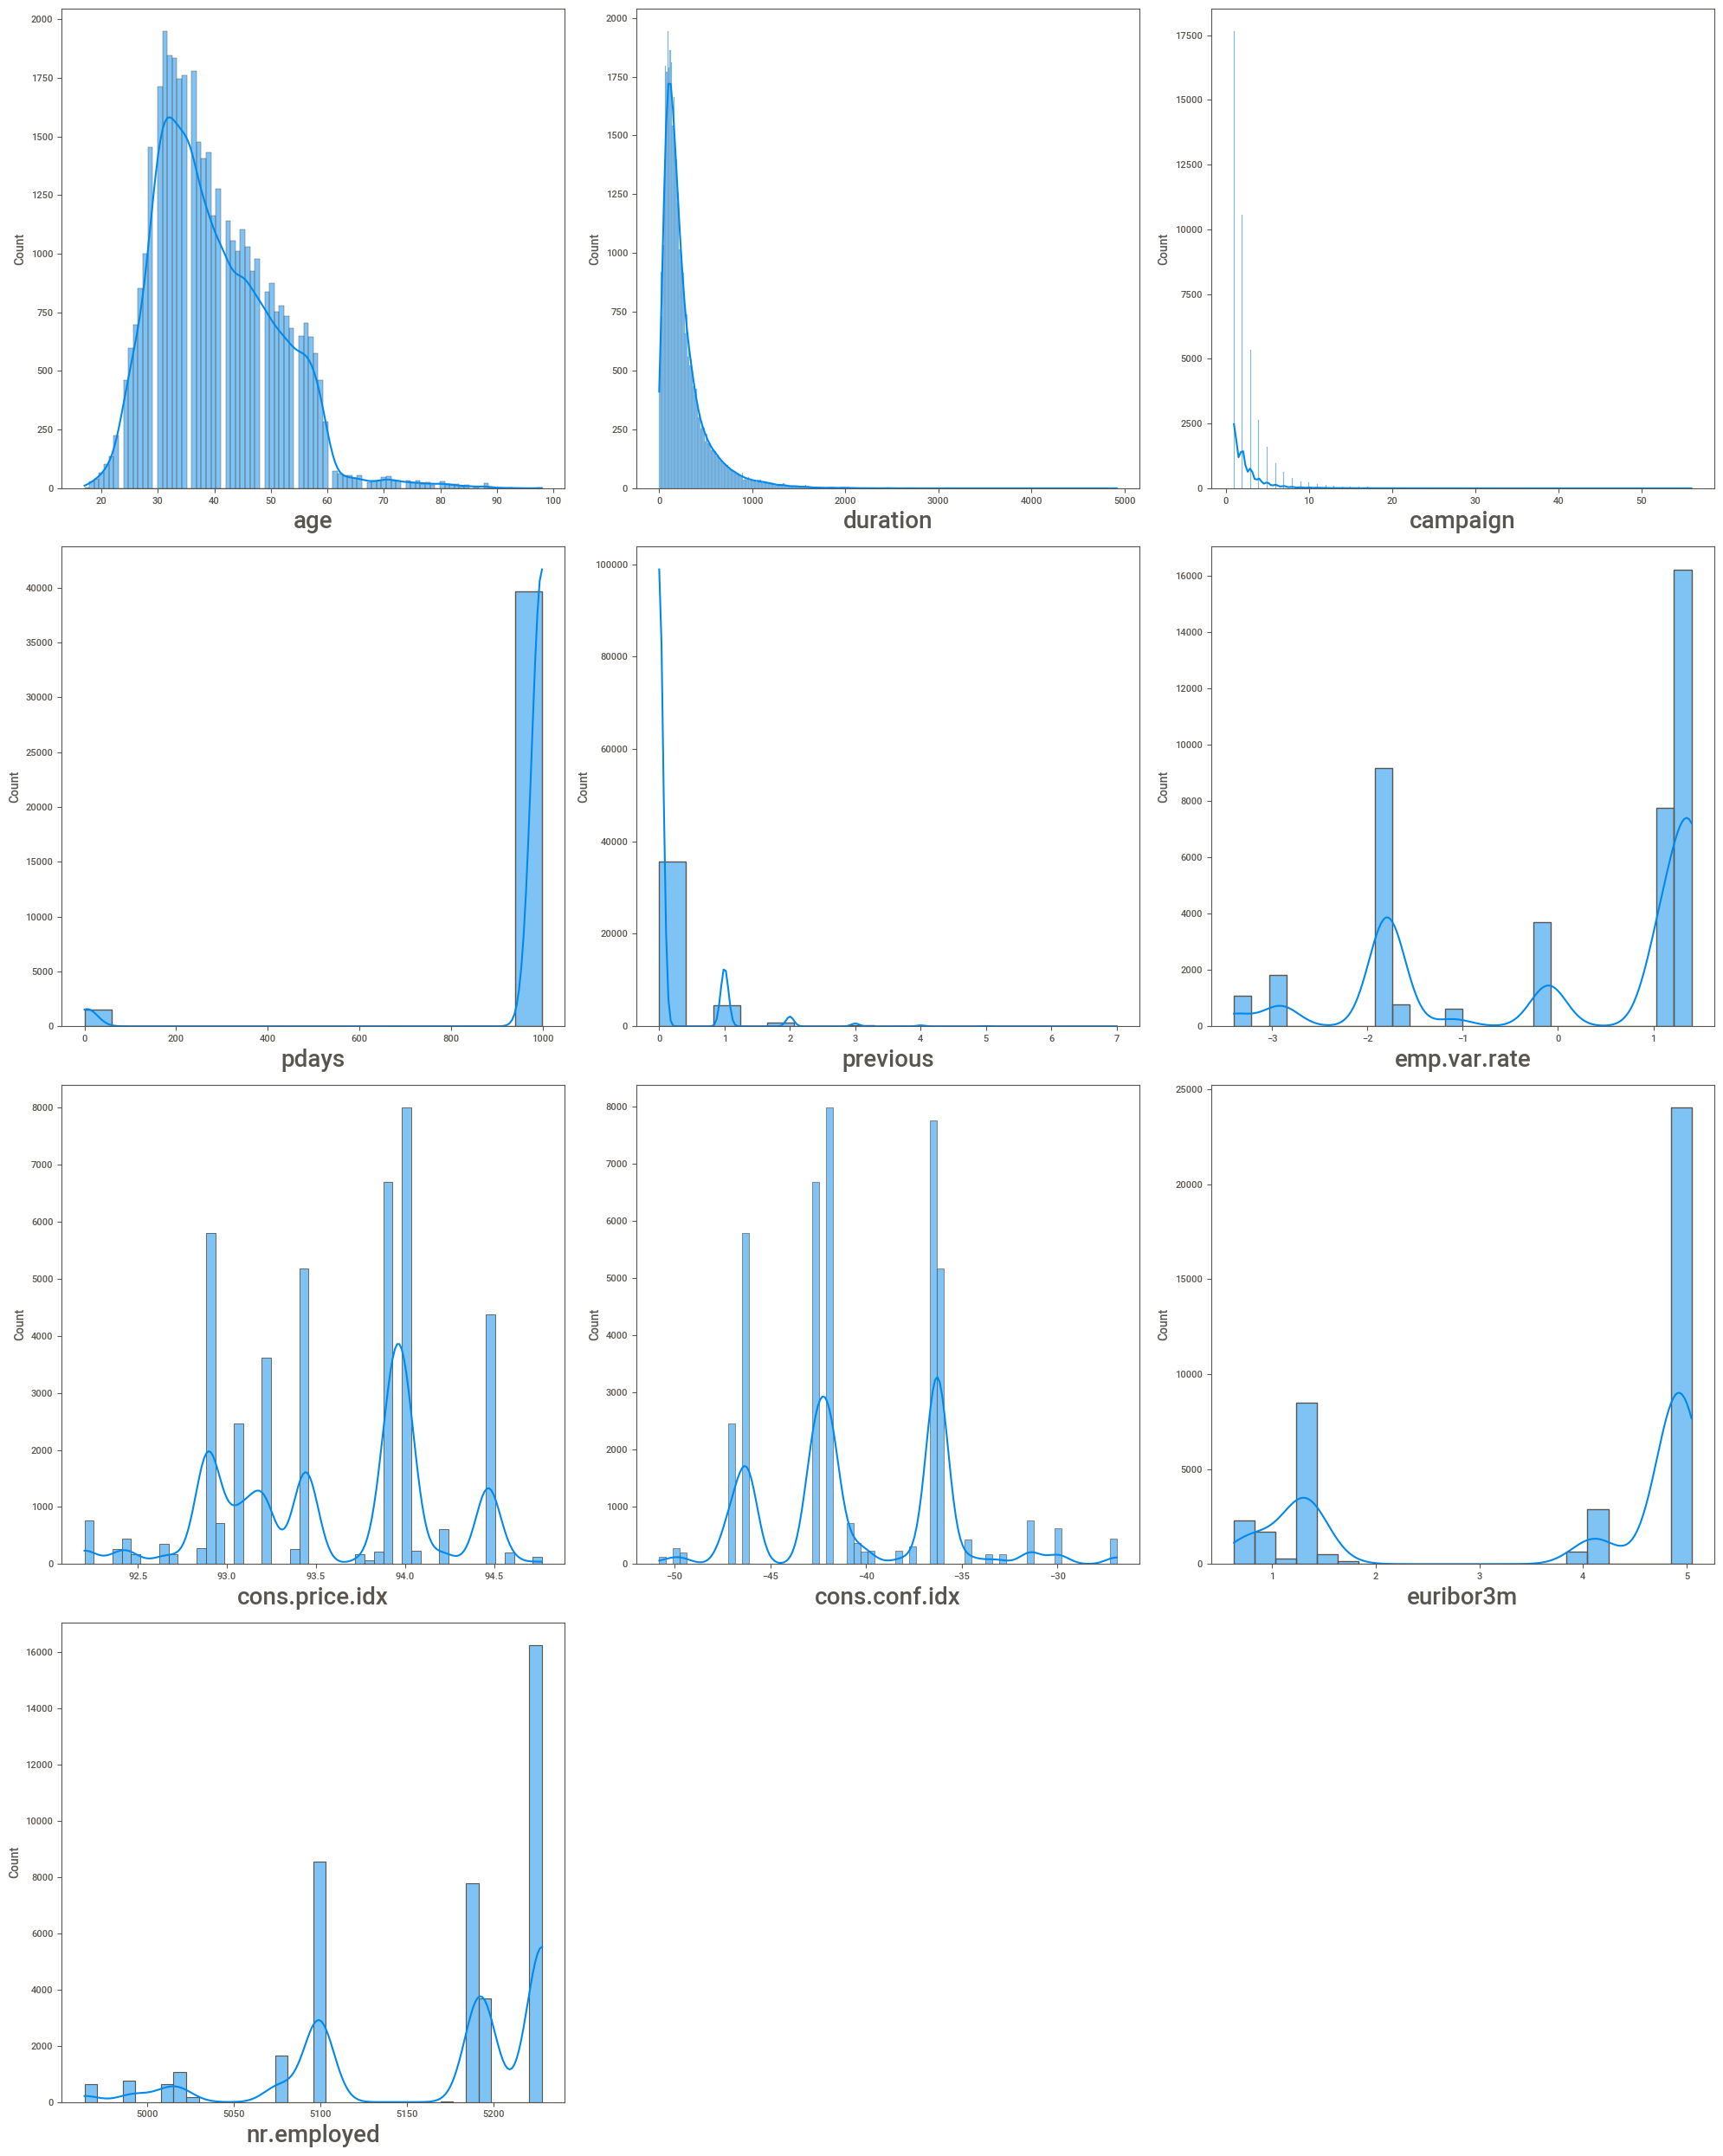

In [17]:

plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in num_col:#accessing the numerical columns
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()

##### For categorical columns 

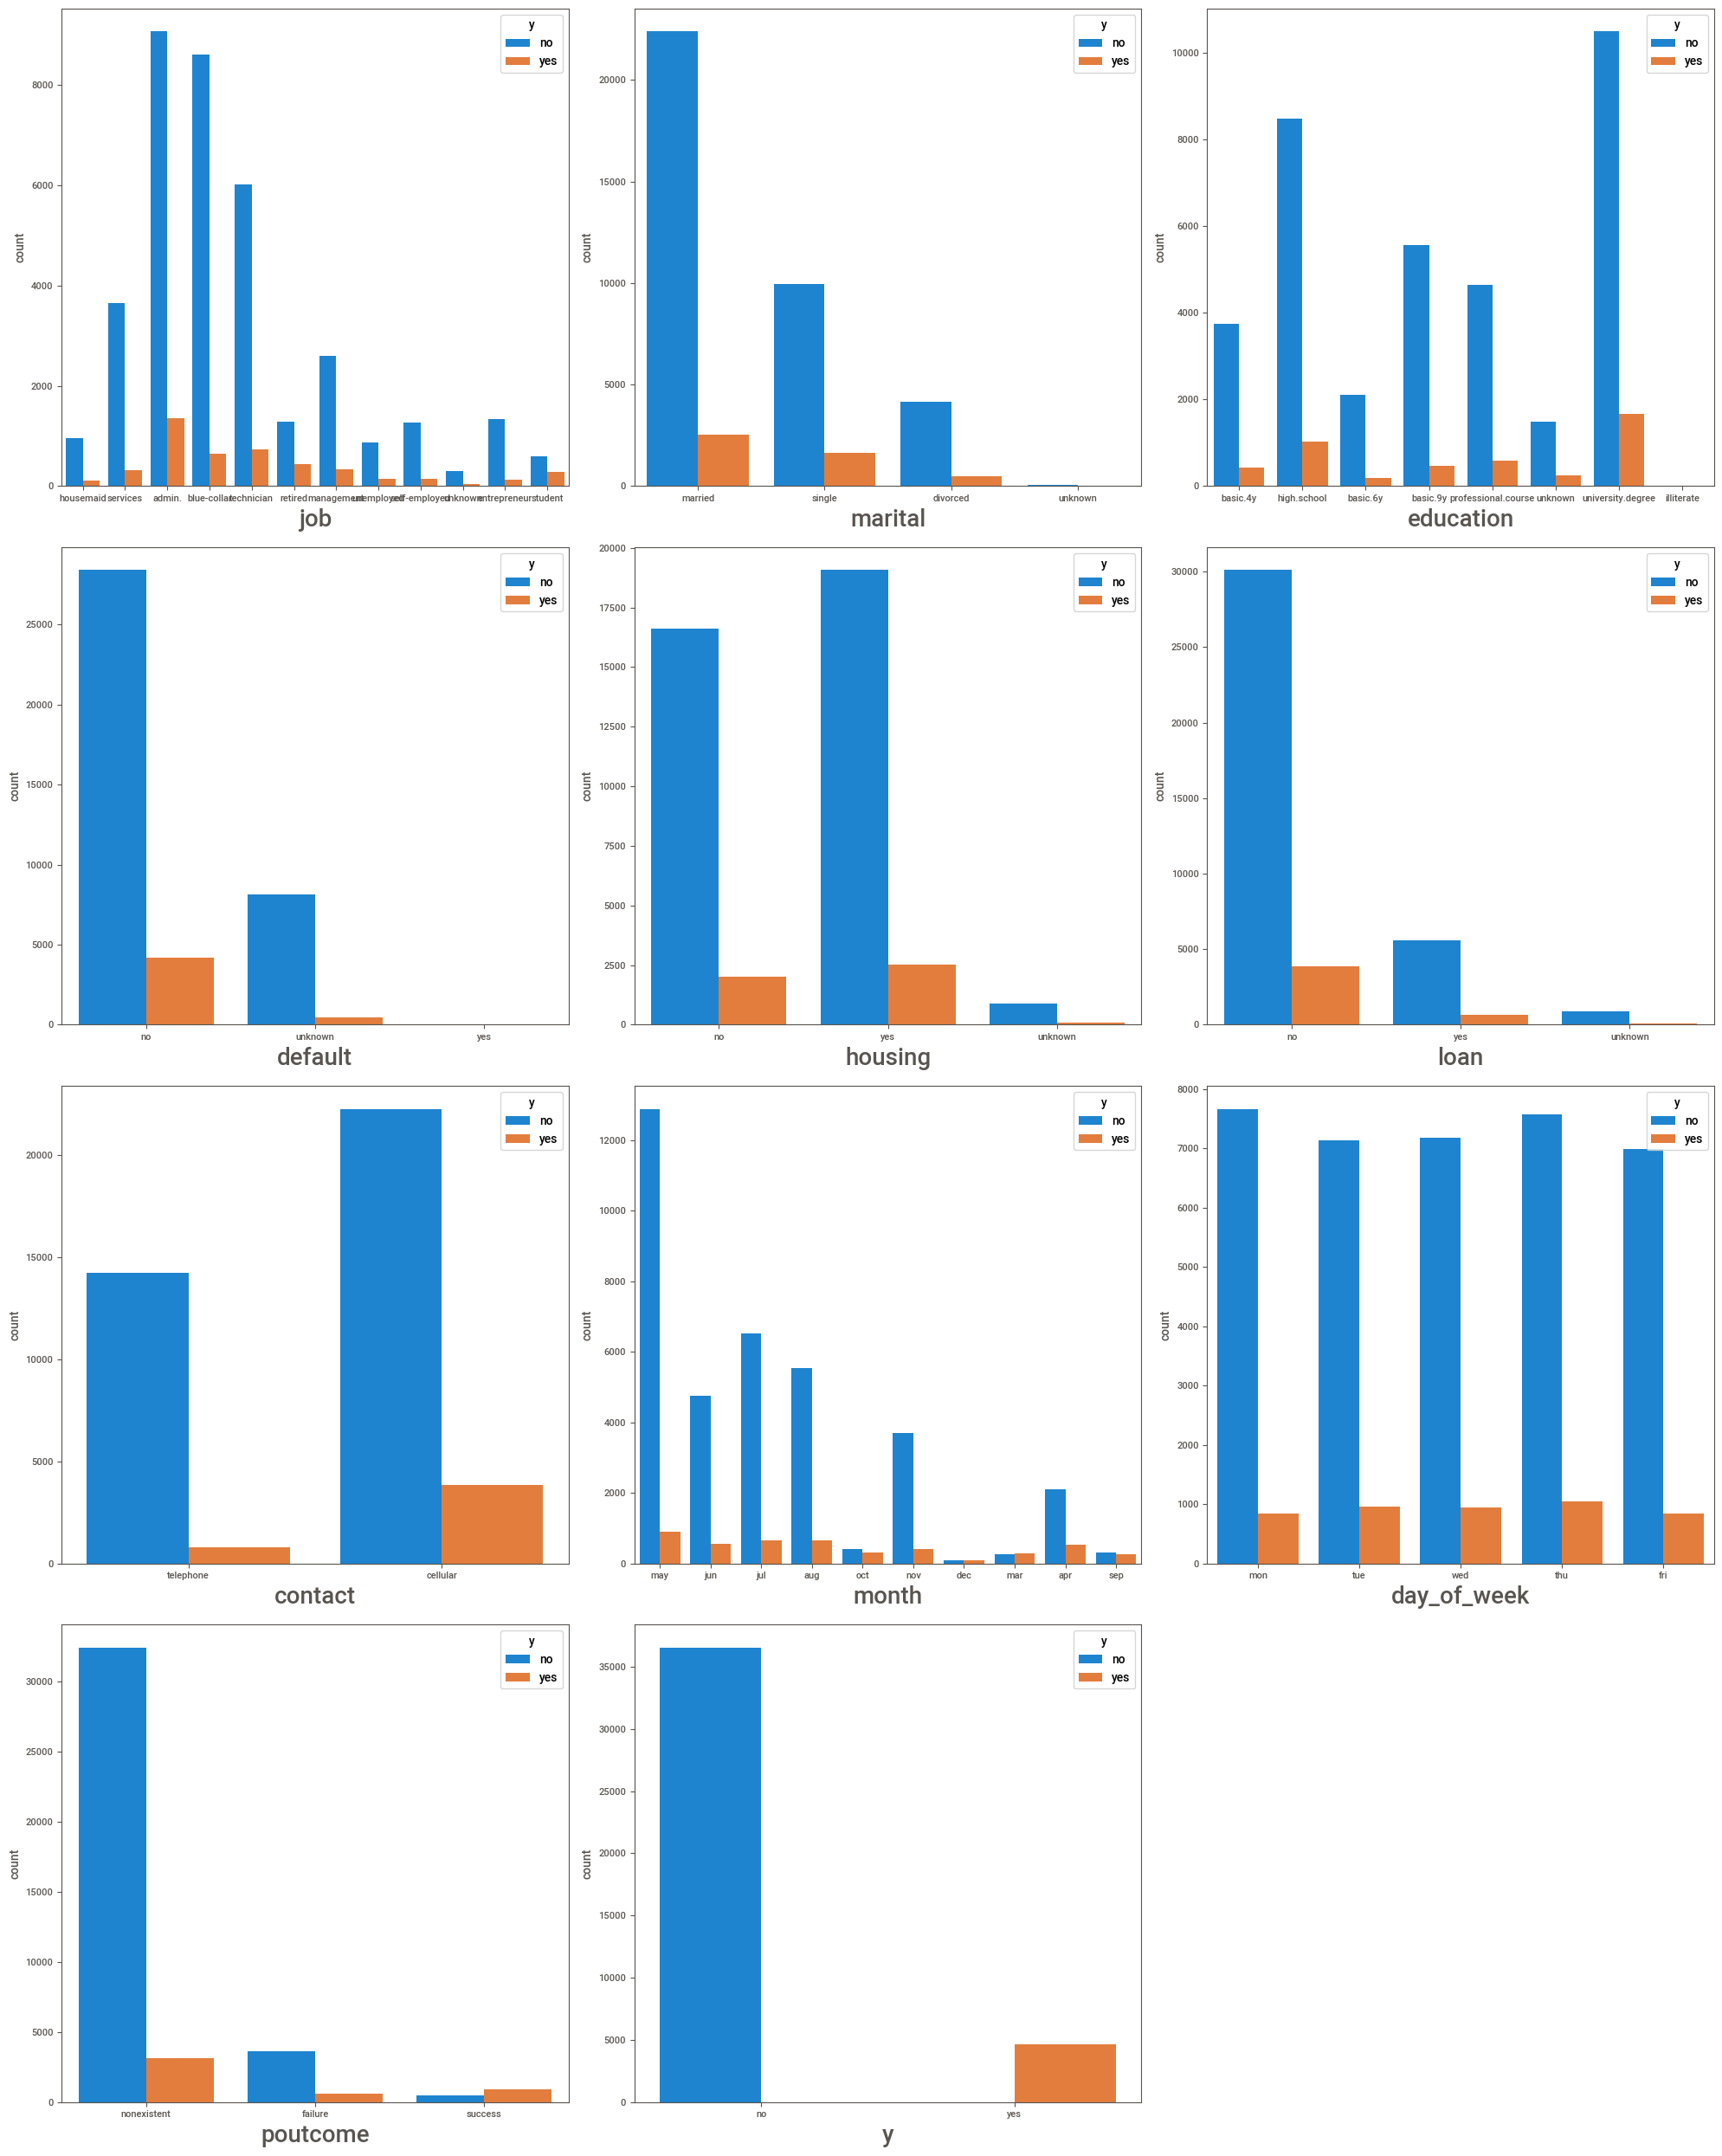

In [18]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in cat_col:#accessing the categorical columns
    if plotnumber<=11 :
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(x=data[column],hue = data["y"])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()
plt.show()

### Insights of Bivariate Analysis 

**Job**
 - most customers are in 'management' or 'blue-collar' jobs..
   
**Marital Status**
  - a majority of the customers are 'married'.
   
**Education**
  - Large number of Secondary in Education
    
**Default**
  - A higher number of 'no' in default indicates a potentially lower risk customer base.
Understanding the proportion of customers with defaults helps in assessing the overall risk.

**Housing**
  - A large number of 'yes' in housing 

**Loan**
  - A large number of 'No' in loan
    
**Contact**
  -'cellular' is the most use contact method.
  
**Month**
  - May has most number of contact month of year.
  
**Day_of_week**
  - In this all days having equal number of values.
 
**Poutcome**
  - In poutcome nonexistant havning the highest number of count value.
  

### Multivariate Analysis 

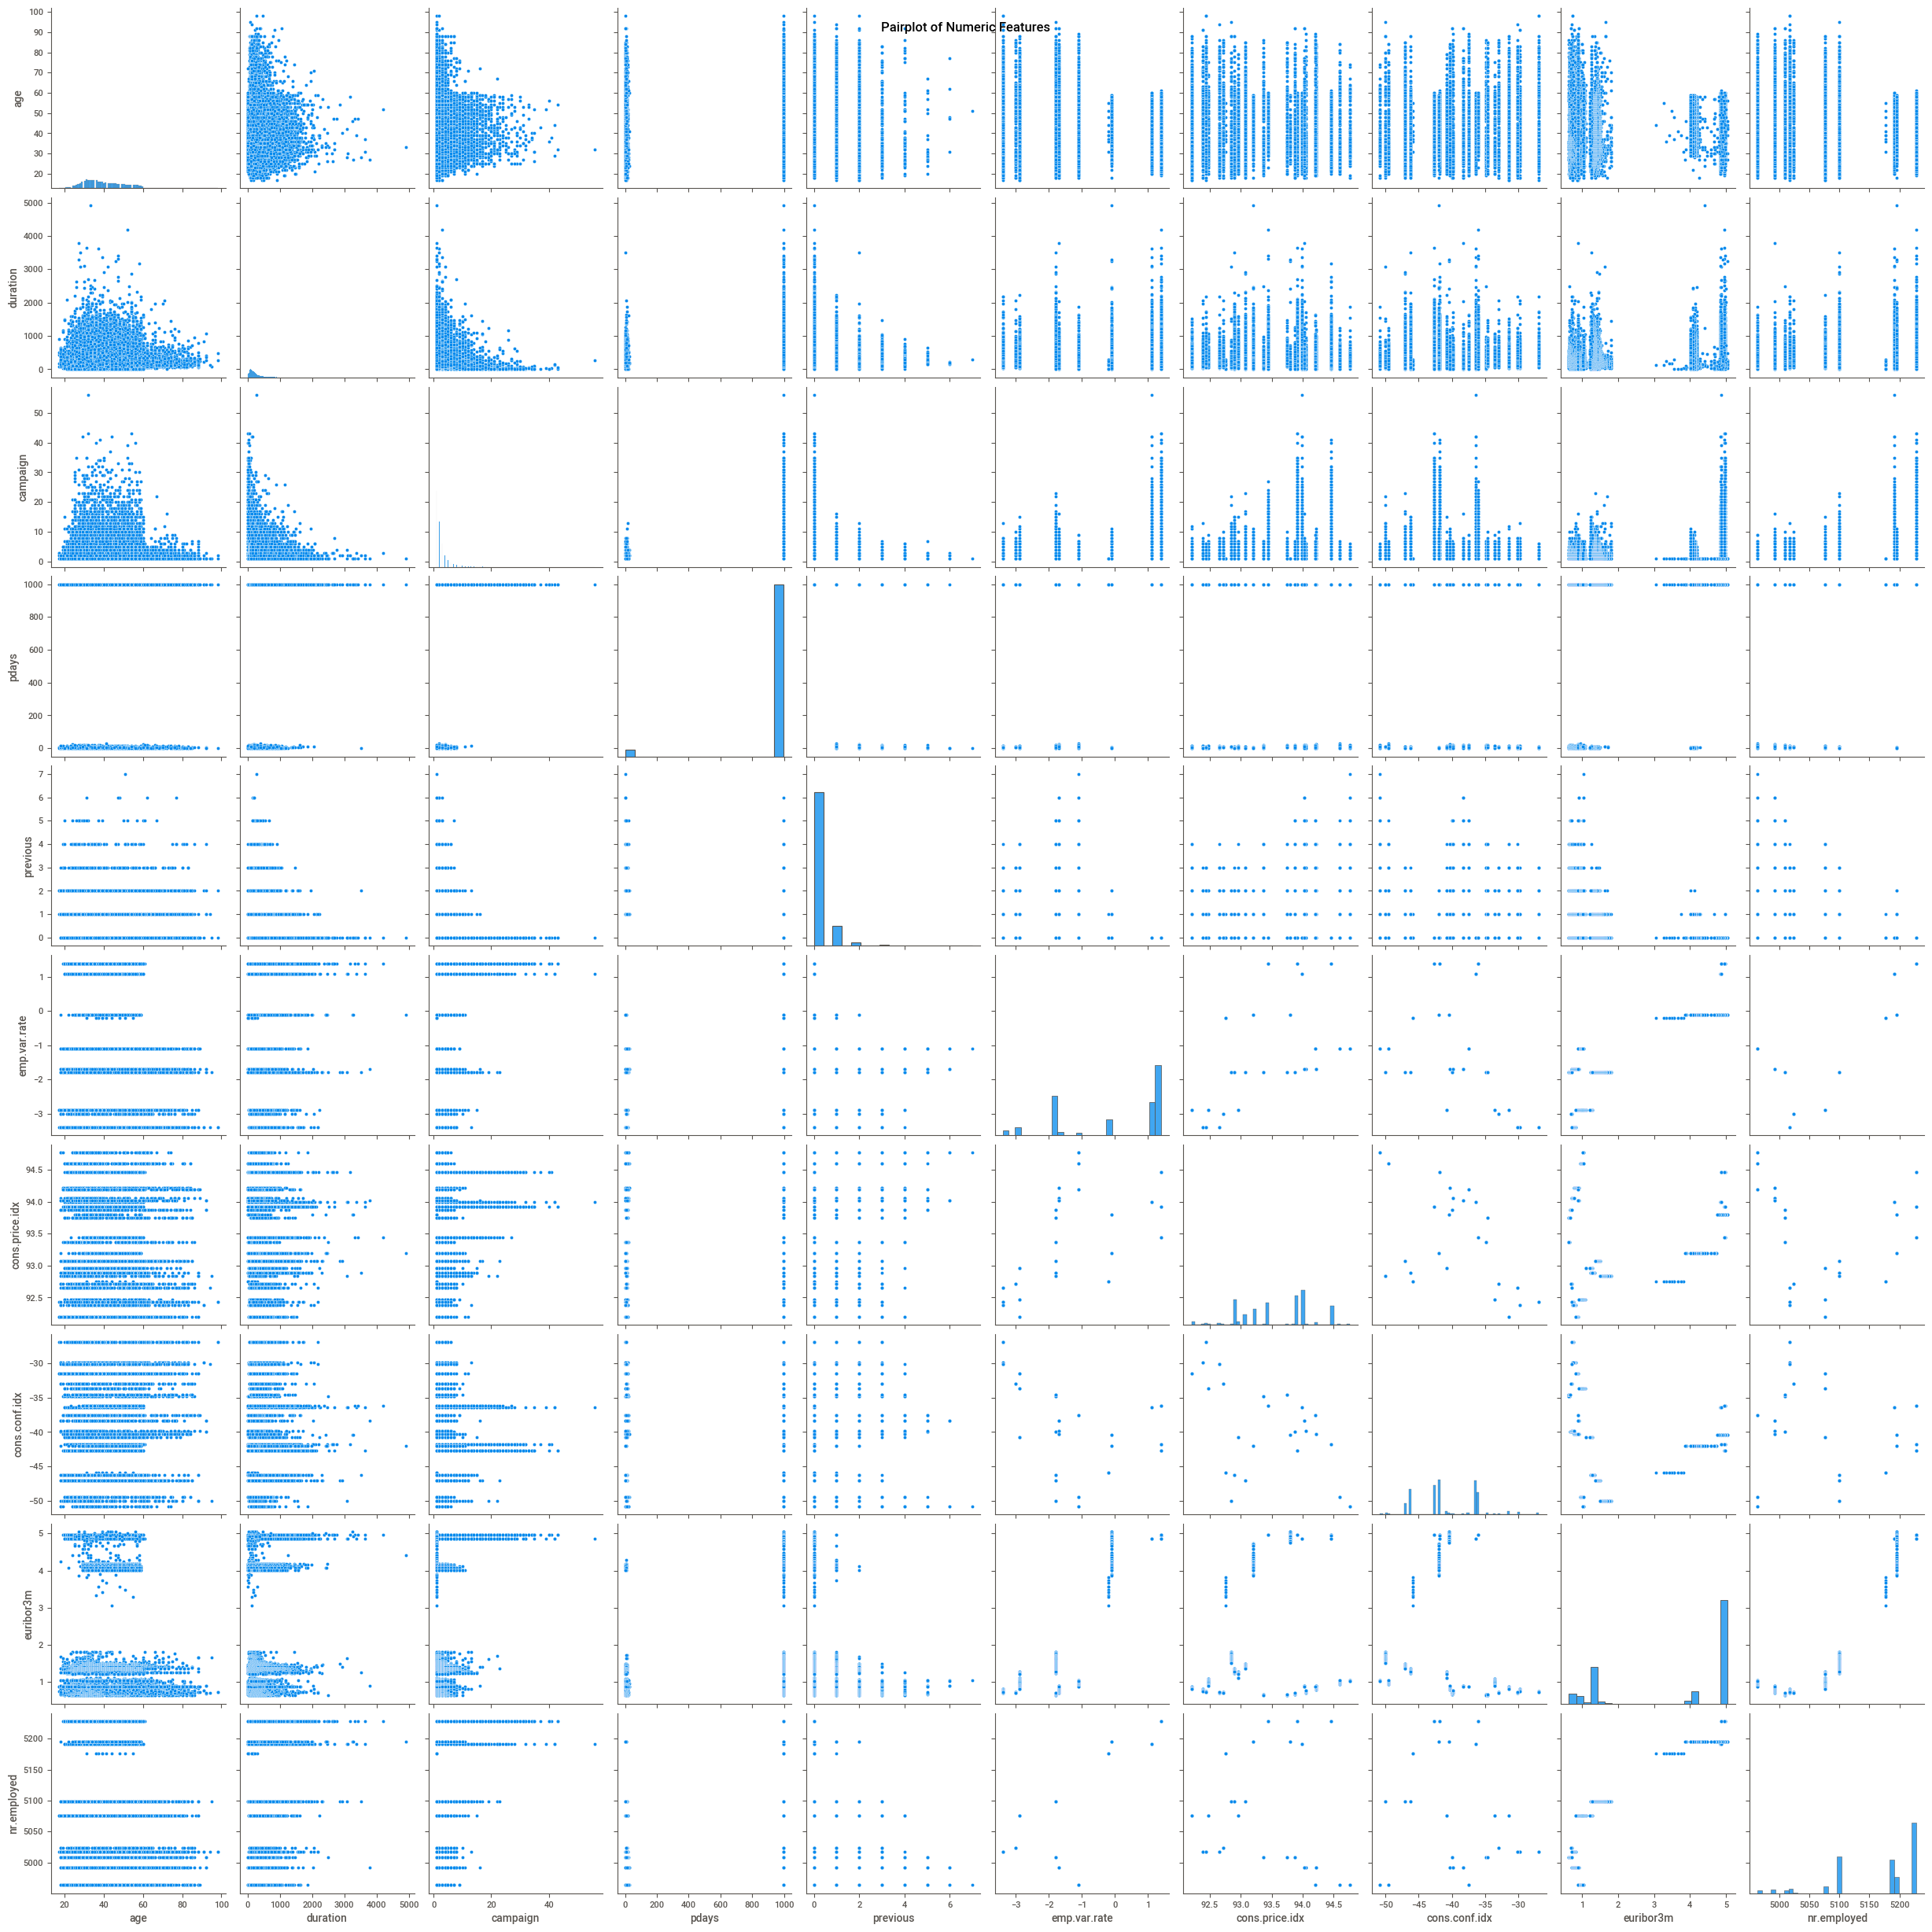

In [19]:
# Pairplot for numeric features
sns.pairplot(data, vars=num_col)
plt.suptitle('Pairplot of Numeric Features')
plt.show()


## Data Preprocessing 

In [20]:
data['job']

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object

In [21]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
for i in cat_col:
    print(cat_col[i].value_counts())
    print(cat_col[i].unique())
    print("******************************")
    

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
******************************
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
['married' 'single' 'divorced' 'unknown']
******************************
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.cour

In [23]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [25]:
data.shape

(41188, 21)

<Axes: >

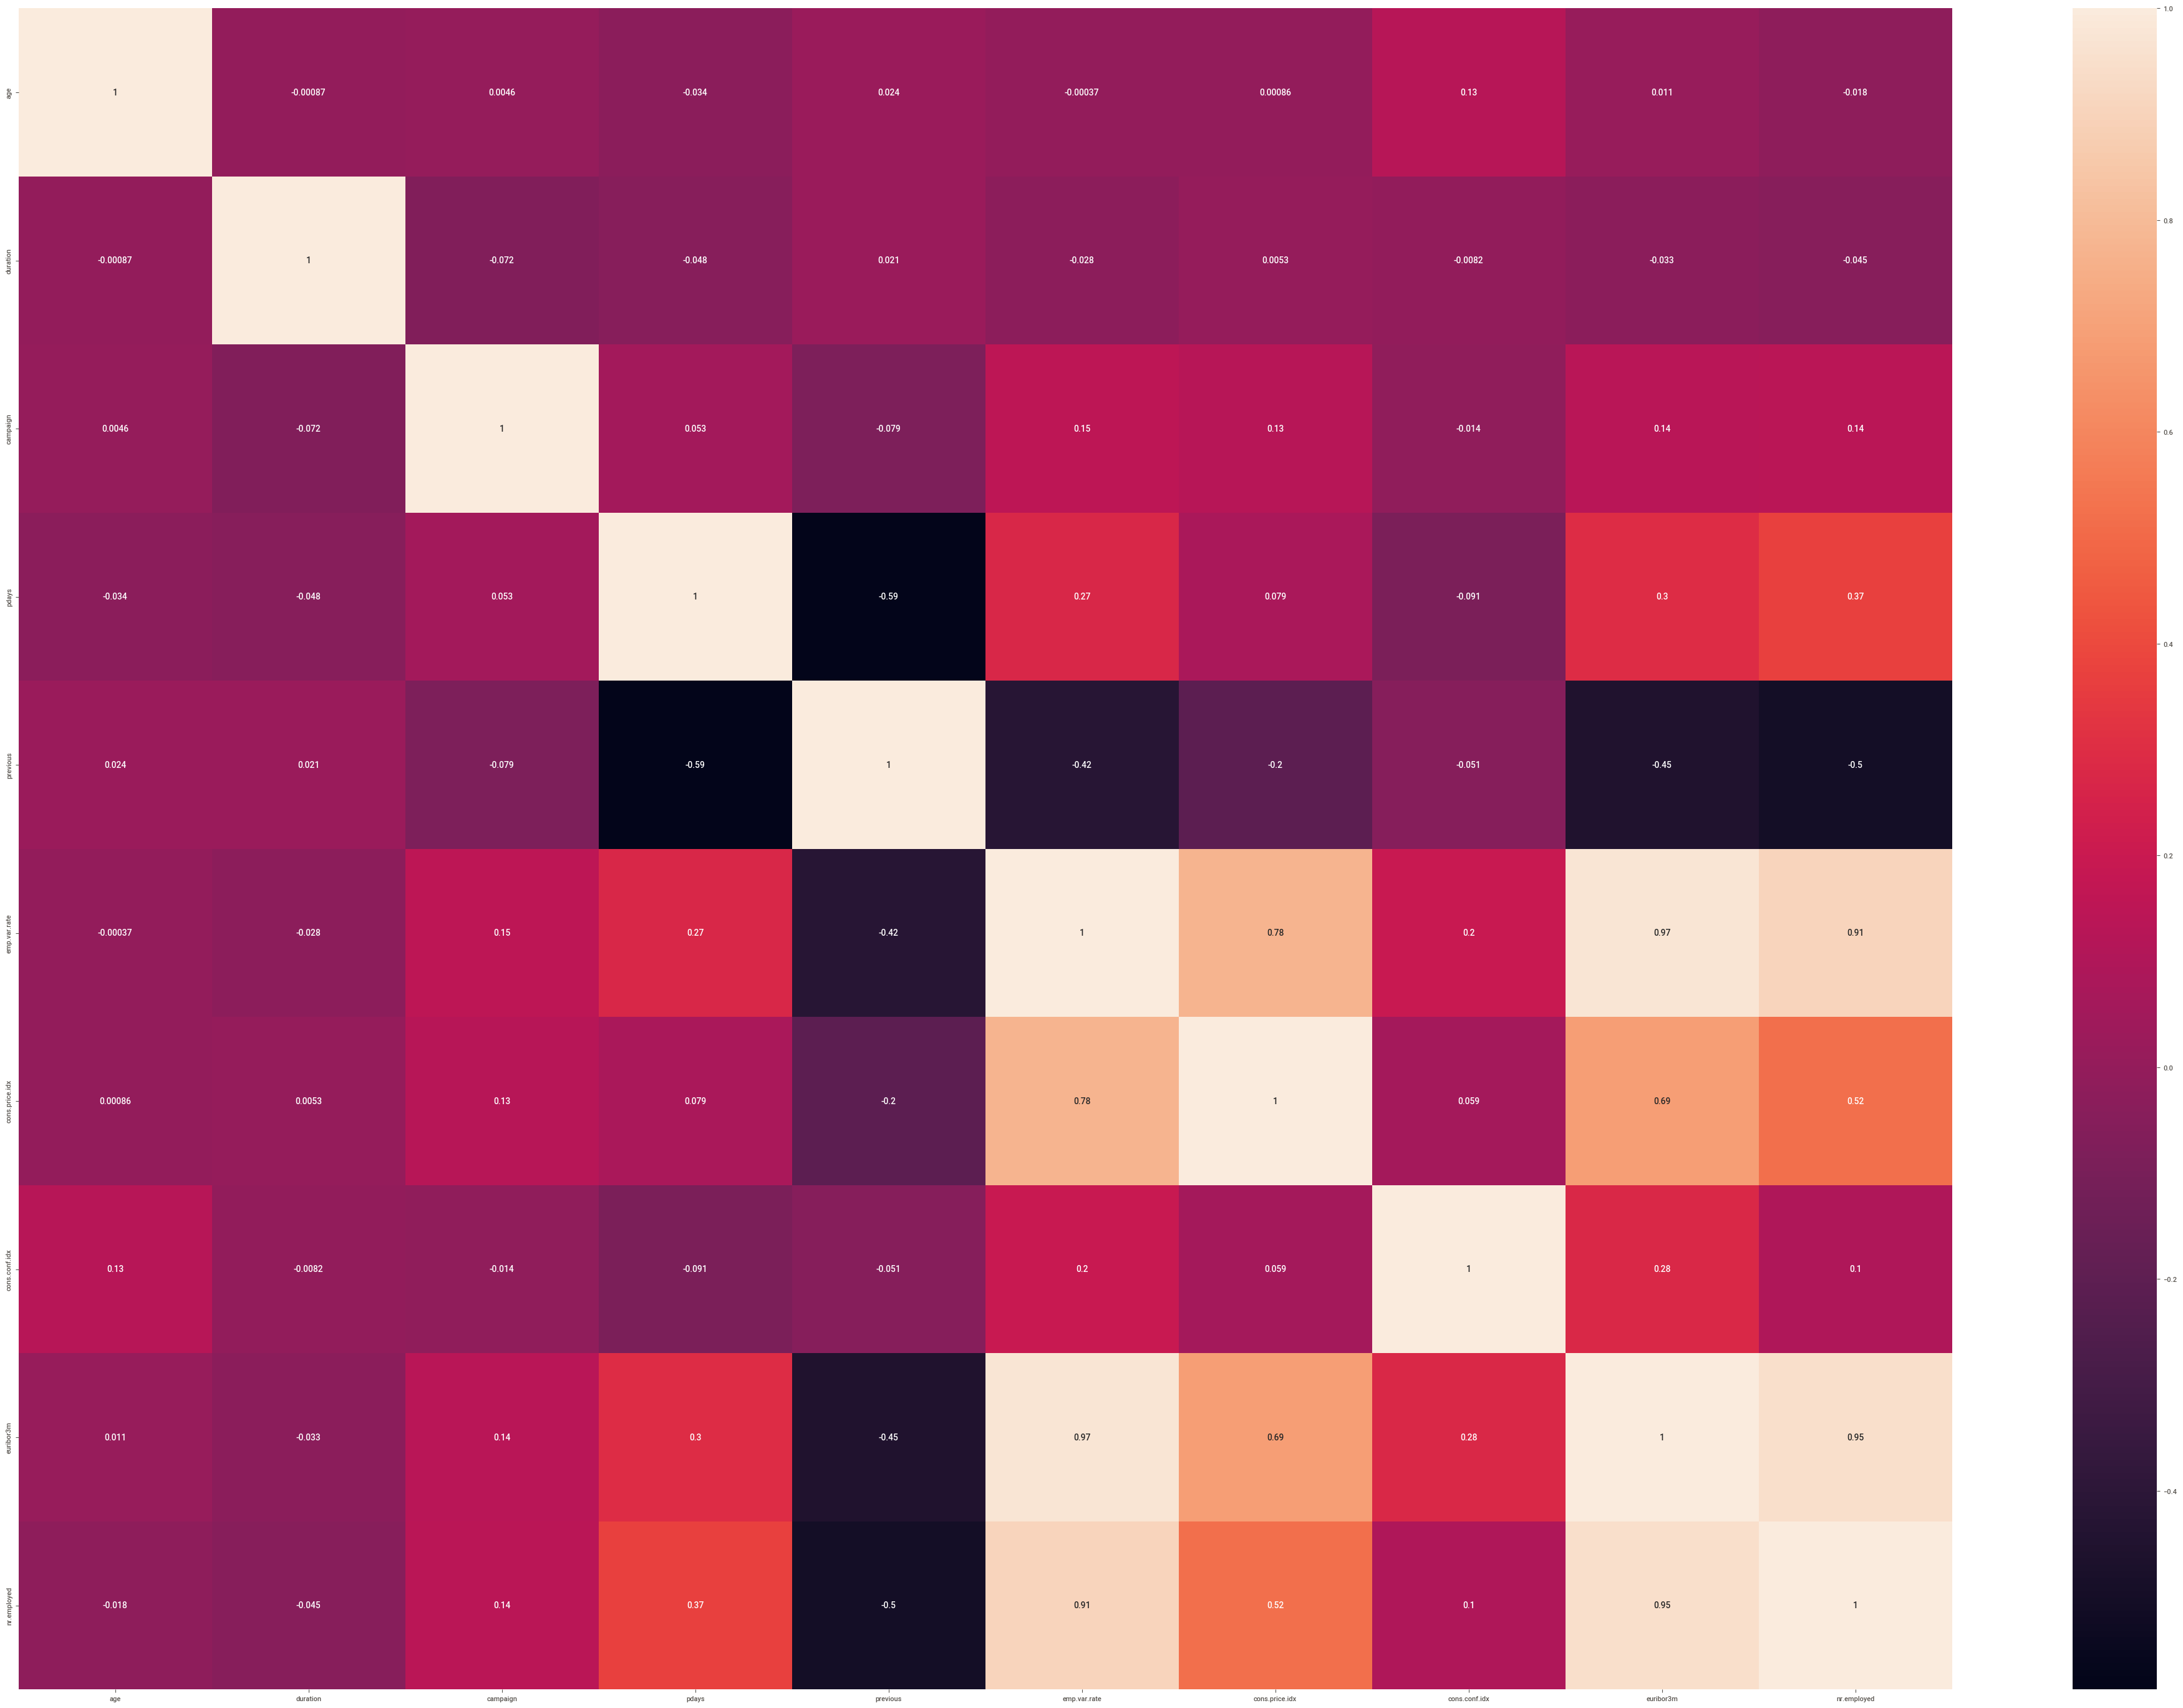

In [26]:
plt.figure(figsize=(50,35))
sns.heatmap(num_col.corr(),annot=True)
## NO correlated features are present

## 1 . Outlier Handeling

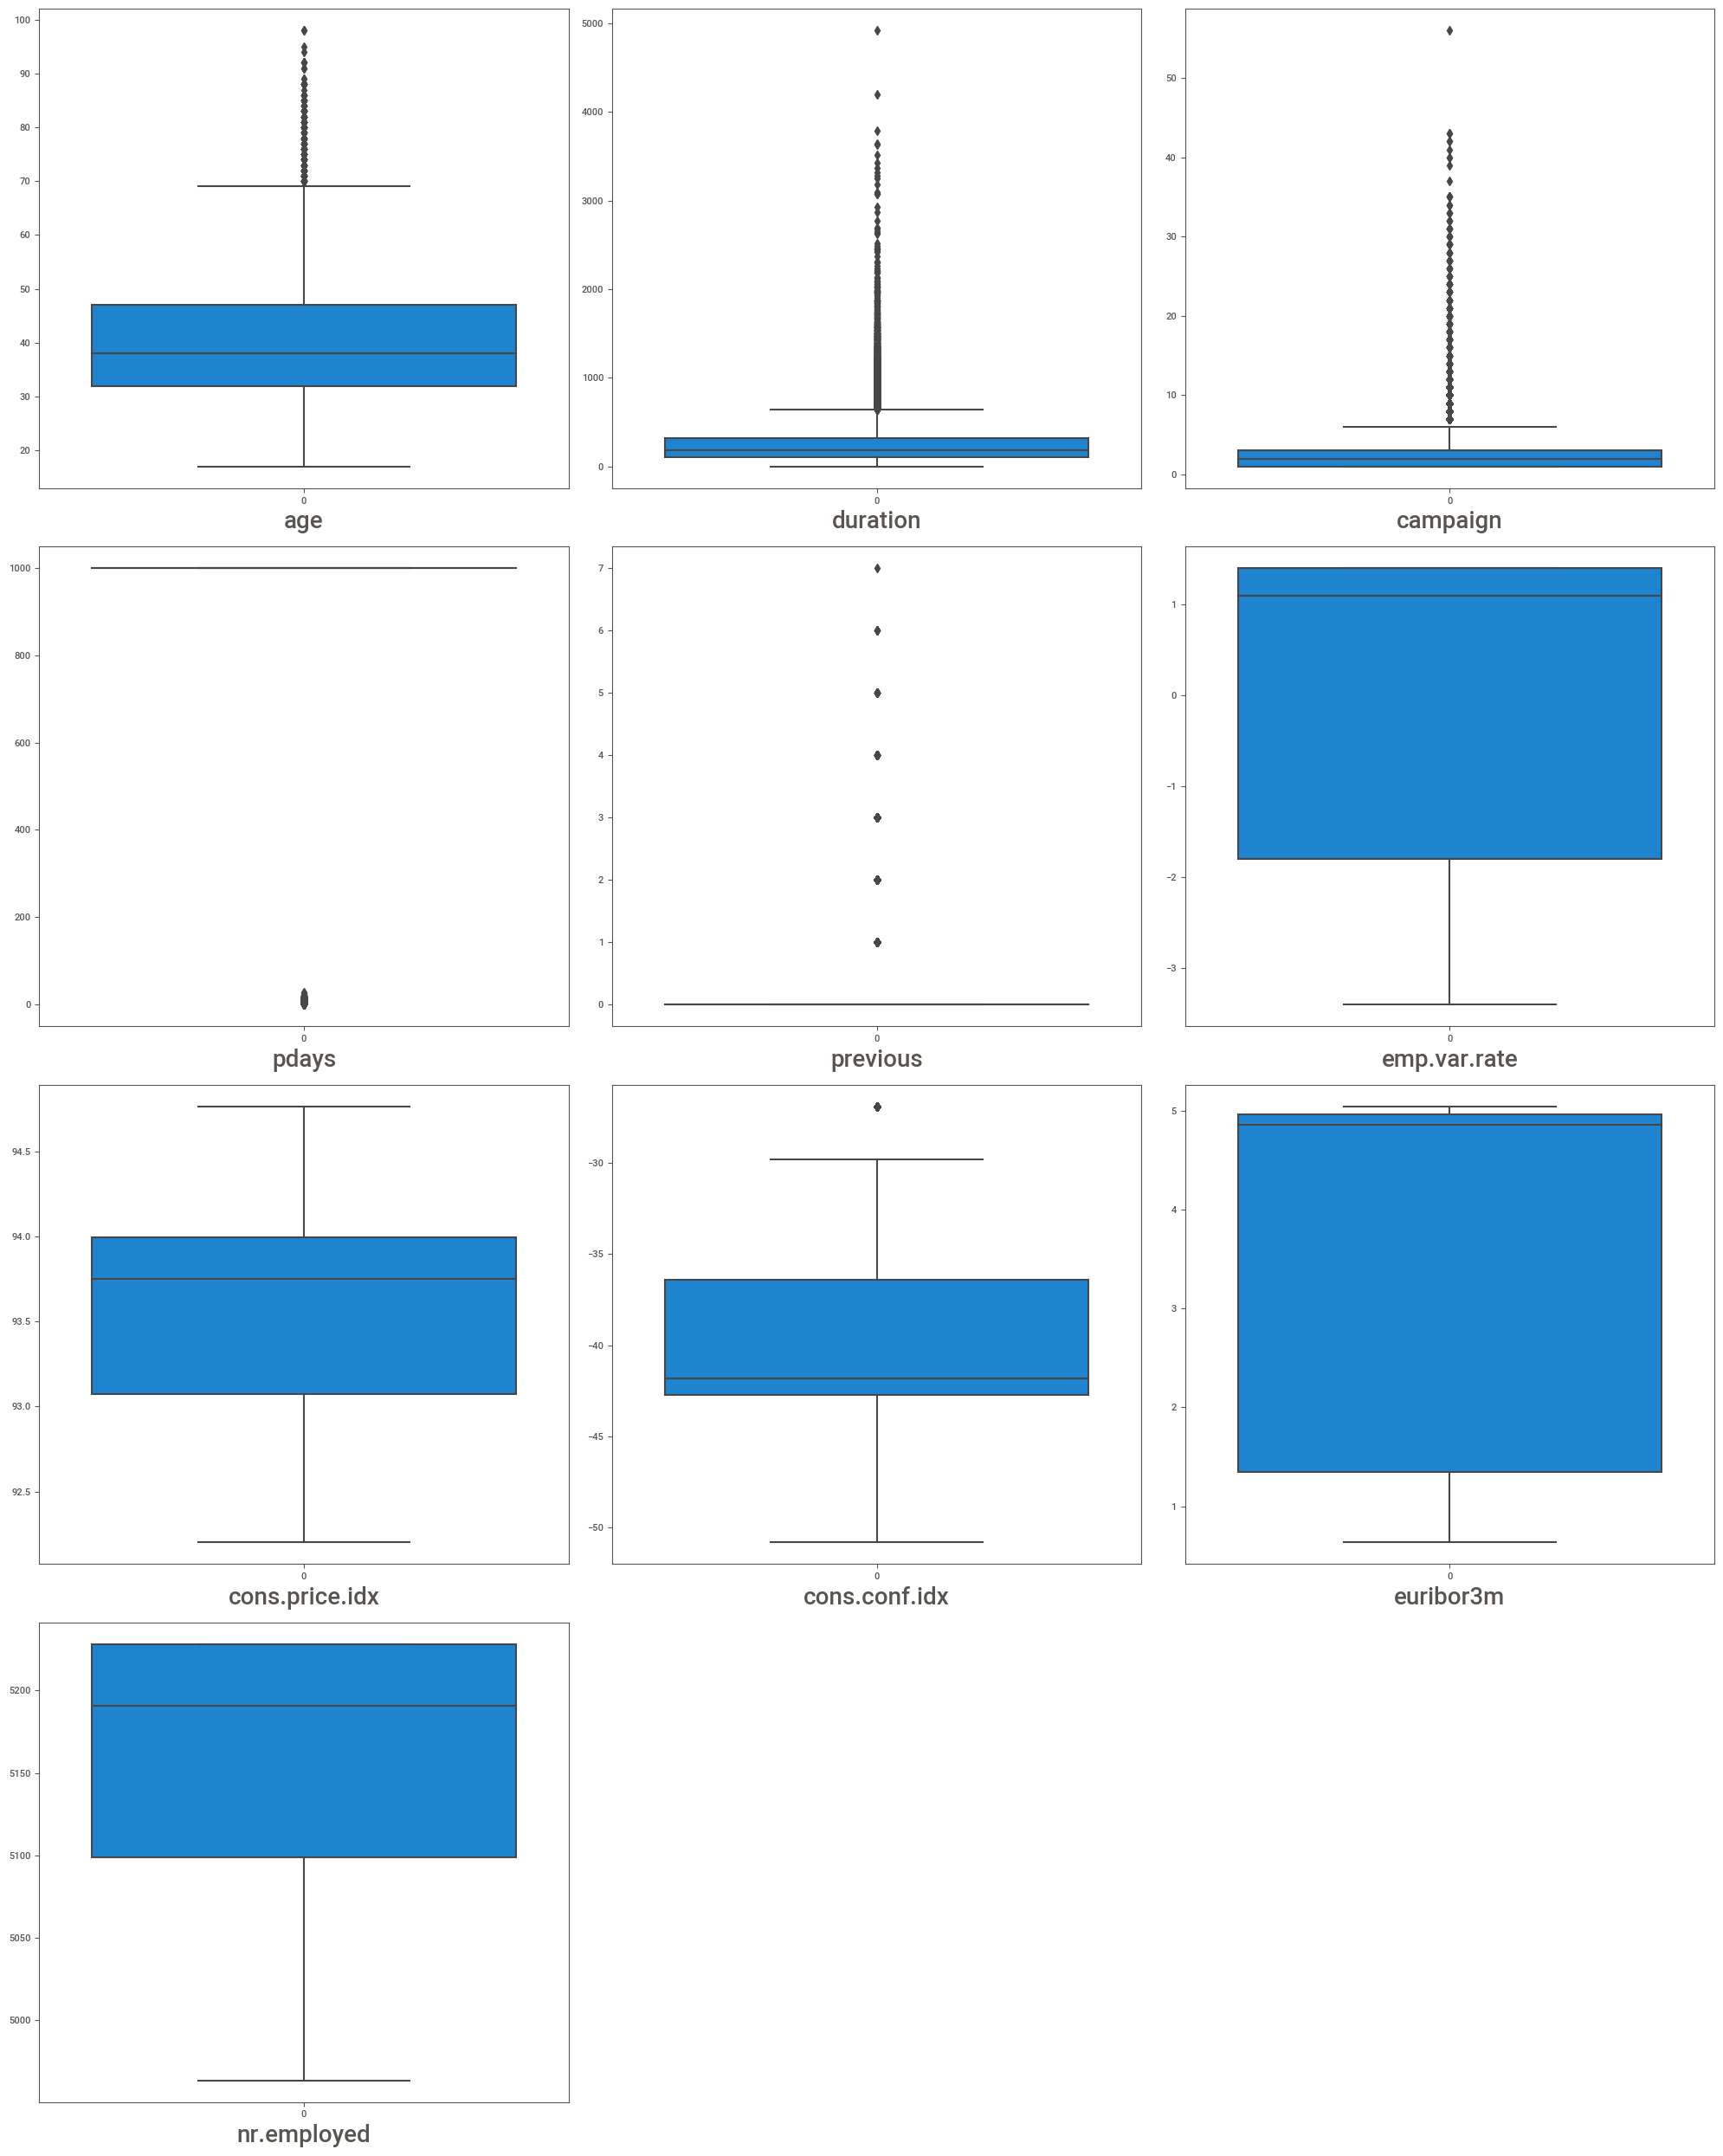

In [27]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in num_col:#accessing the categorical columns
    if plotnumber<=11 :
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()
plt.show()

#### 1. Age

<Axes: xlabel='age', ylabel='Count'>

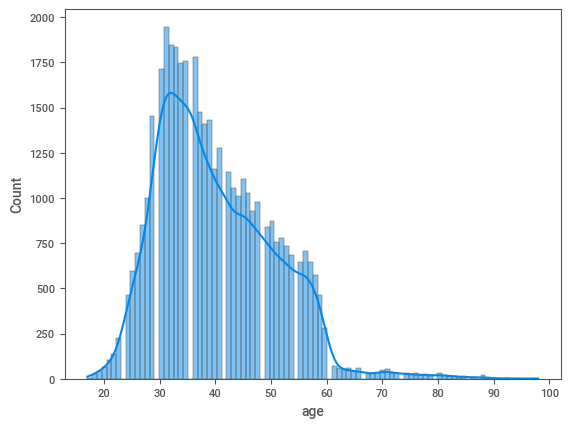

In [28]:
sns.histplot(x=data["age"],kde=True)

- Age having Left Skewed distribution so kwe use IQR method for imputing Outliers.

In [29]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)

IQR=Q3-Q1

In [30]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

In [31]:
data.age.loc[data["age"] > upper_limit]

27713    70
27757    76
27780    73
27800    88
27802    88
         ..
40986    84
40996    81
41004    80
41183    73
41187    74
Name: age, Length: 469, dtype: int64

In [32]:
data.age.loc[data["age"] < lower_limit]

Series([], Name: age, dtype: int64)

In [33]:
(len(data.age.loc[data["age"] > upper_limit])/len(data))*100

1.1386811692726035

In [34]:
data.loc[data["age"] > upper_limit, "age"] = np.median(data.age)

<Axes: >

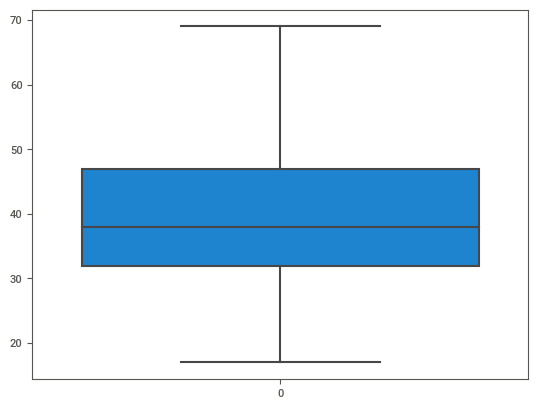

In [35]:
sns.boxplot(data["age"])

#### 2. Duration

<Axes: xlabel='duration', ylabel='Count'>

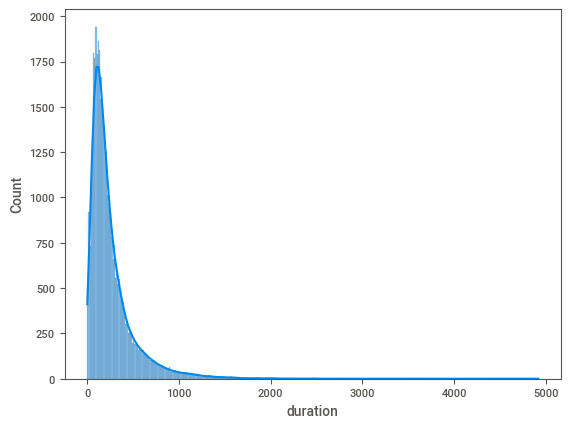

In [36]:
sns.histplot(data["duration"] , kde=True)

In [37]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)

IQR=Q3-Q1

In [38]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(upper_limit,lower_limit)

69.5 9.5


In [39]:
data.loc[data["duration"] > upper_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [40]:
data.loc[data["duration"] < lower_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
288,60,blue-collar,married,unknown,unknown,yes,no,telephone,may,mon,5,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1481,45,management,married,university.degree,no,yes,no,telephone,may,thu,4,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1510,41,blue-collar,married,professional.course,unknown,yes,no,telephone,may,thu,8,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2527,49,blue-collar,married,basic.9y,no,yes,no,telephone,may,tue,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
2910,36,management,married,university.degree,no,yes,no,telephone,may,wed,8,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40939,27,student,single,high.school,no,no,no,telephone,oct,tue,5,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,no
40944,52,technician,married,university.degree,no,yes,no,telephone,oct,wed,6,1,999,1,failure,-1.1,94.601,-49.5,0.985,4963.6,no
40967,34,student,single,professional.course,no,yes,no,telephone,oct,fri,6,1,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no
40997,25,student,married,high.school,no,yes,no,telephone,oct,wed,7,1,999,0,nonexistent,-1.1,94.601,-49.5,1.016,4963.6,no


In [41]:
((len(data.loc[data["duration"] > upper_limit]) + len(data.loc[data["duration"] < lower_limit]))/len(data))*100

87.51820918714188

- **duration** has too much outliers so we doews not handel them.

#### 3. Campaign

In [42]:
data.campaign

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign, Length: 41188, dtype: int64

<Axes: xlabel='campaign', ylabel='Count'>

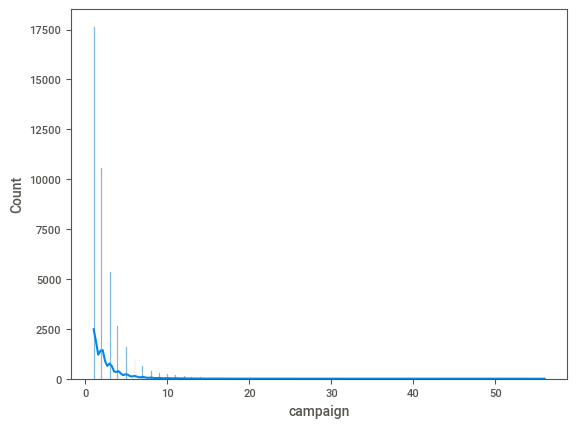

In [43]:
sns.histplot(data["campaign"],kde=True)

In [44]:
Q1=data.campaign.quantile(0.25)
Q3=data.campaign.quantile(0.75)

IQR=Q3-Q1

In [45]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [46]:
data.loc[data["campaign"] > upper_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,388,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1043,41,technician,single,university.degree,unknown,no,no,telephone,may,wed,79,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,253,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1097,51,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,244,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,521,7,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,retired,married,basic.9y,no,no,no,telephone,sep,fri,543,9,999,1,failure,-1.1,94.199,-37.5,0.883,4963.6,no
40631,38,retired,married,basic.4y,no,yes,no,cellular,sep,mon,213,7,999,0,nonexistent,-1.1,94.199,-37.5,0.882,4963.6,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,157,7,3,5,success,-1.1,94.199,-37.5,0.879,4963.6,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,246,9,999,2,failure,-1.1,94.199,-37.5,0.879,4963.6,no


In [47]:
data.loc[data["campaign"] < lower_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [48]:
(len(data.loc[data["campaign"] > upper_limit])/len(data))*100

5.8415072351170245

#### 4. pdays

<Axes: xlabel='pdays', ylabel='Count'>

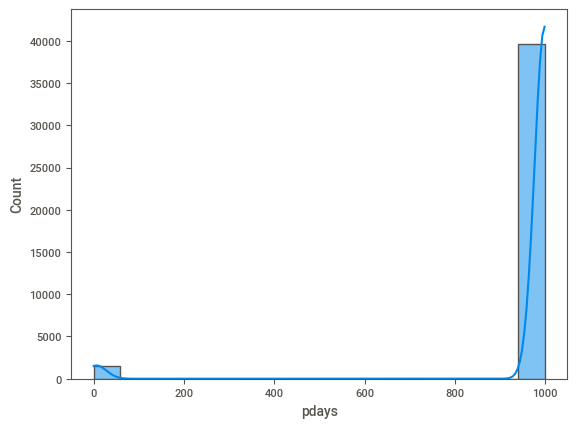

In [49]:
sns.histplot(data["pdays"], kde=True)

In [50]:
Q1=data.pdays.quantile(0.25)
Q3=data.pdays.quantile(0.75)

IQR=Q3-Q1

In [51]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [52]:
data.loc[data["pdays"] > upper_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [53]:
data.loc[data["pdays"] < lower_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,119,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,112,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,94,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,77,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,200,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,385,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


In [54]:
(len(data.loc[data["pdays"] < lower_limit])/len(data))*100

3.6782558026609693

In [55]:
data.loc[data["pdays"] < lower_limit , "pdays"] = np.median(data.pdays)

#### 5. previous

<Axes: xlabel='previous', ylabel='Count'>

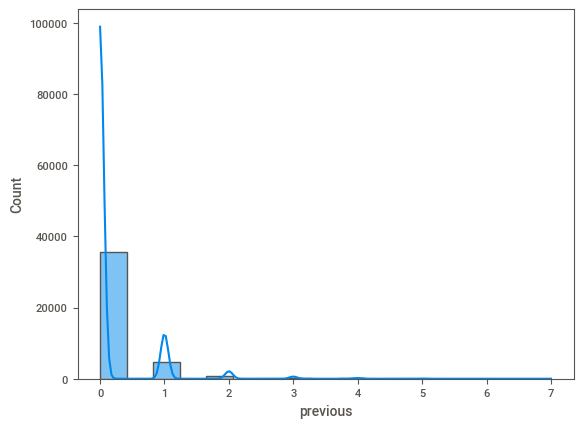

In [56]:
sns.histplot(data["previous"],kde=True)

In [57]:
Q1=data.previous.quantile(0.25)
Q3=data.previous.quantile(0.75)

IQR=Q3-Q1

In [58]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [59]:
data.loc[data["previous"] > upper_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,119,1,999,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,999,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,999,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,999,1,success,-1.1,94.767,-50.8,1.028,4963.6,no


In [60]:
data.loc[data["previous"] < lower_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [61]:
(len(data.loc[data["previous"] > upper_limit])/len(data))*100

13.65689035641449

- total percentage of outliers is 13% so we does not handele them.

#### 6. cons.conf.idx

<Axes: xlabel='cons.conf.idx', ylabel='Count'>

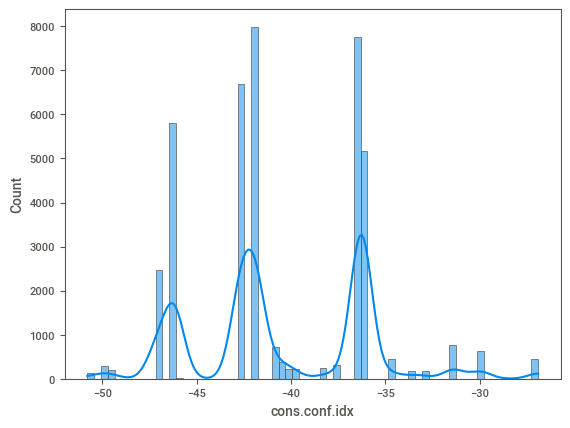

In [62]:
sns.histplot(data["cons.conf.idx"],kde=True)

In [63]:
Q1=data["cons.conf.idx"].quantile(0.25)
Q3=data["cons.conf.idx"].quantile(0.75)

IQR=Q3-Q1

In [64]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [65]:
data.loc[data["cons.conf.idx"] > upper_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38154,50,management,married,university.degree,no,yes,no,cellular,oct,thu,305,2,999,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
38155,37,admin.,single,university.degree,no,yes,no,cellular,oct,thu,447,3,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
38156,59,technician,single,basic.6y,no,no,no,cellular,oct,thu,86,1,999,2,failure,-3.4,92.431,-26.9,0.754,5017.5,no
38157,31,admin.,married,university.degree,no,yes,no,cellular,oct,thu,760,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
38158,35,admin.,married,high.school,no,yes,no,cellular,oct,thu,194,1,999,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,retired,married,basic.4y,no,yes,yes,cellular,oct,fri,257,3,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38597,18,student,single,basic.6y,no,no,yes,cellular,oct,fri,368,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38598,59,retired,divorced,basic.4y,no,yes,no,telephone,oct,fri,152,4,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,no
38599,37,admin.,single,university.degree,no,no,no,cellular,oct,fri,416,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes


In [66]:
data.loc[data["cons.conf.idx"] < lower_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [67]:
(len(data.loc[data["cons.conf.idx"] > upper_limit])/len(data))*100

1.0852675536564047

In [68]:
data.loc[data["cons.conf.idx"] > upper_limit,"cons.conf.idx"]=np.median(data["cons.conf.idx"])

## 2. Encoding

In [69]:
cat_col

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [70]:
for i in cat_col:
    print(cat_col[i].value_counts())
    print("******************************")

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
******************************
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
******************************
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
******************************
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
******************************
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
**************************

In [71]:
cat_col.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

#### Here we use Frequency Encoding for encode categorical data

In [72]:
data.job=data.job.map({"unknown":0,"student":1,"unemployed":2,"housemaid":3,"self-employed":4,"entrepreneur":5,"retired":6,"management":7,"services":8,"technician":9,"blue-collar":10,"admin.":11})

In [73]:
data.marital=data.marital.map({"unknown":0,"divorced":1,"single":2,"married":3})

In [74]:
data.education=data.education.map({"illiterate":0,"unknown":1,"basic.6y":2,"basic.4y":3,"professional.course":4,"basic.9y":5,"high.school":6,"university.degree":7})

In [75]:
data.default=data.default.map({"yes":0,"unknown":1,"no":2})

In [76]:
data.housing=data.housing.map({"unknown":0,"no":1,"yes":2})

In [77]:
data.loan=data.loan.map({"unknown":0,"yes":1,"no":2})

In [78]:
data.contact=data.contact.map({"telephone":0,"cellular":1})

In [79]:
data.month=data.month.map({'may':9, 'jun':6, 'jul':8, 'aug':7, 'oct':3, 'nov':5, 'dec':0, 'mar':1, 'apr':4,'sep':2})

In [80]:
data.day_of_week=data.day_of_week.map({'mon':3, 'tue':1, 'wed':2, 'thu':4, 'fri':0})

In [81]:
data.poutcome=data.poutcome.map({'nonexistent':2, 'failure':1, 'success':0})

In [82]:
data.y=data.y.map({"yes":0 , "no":1})

In [83]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,0,9,3,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,1
1,57,8,3,6,1,1,2,0,9,3,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,1
2,37,8,3,6,2,2,2,0,9,3,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,1
3,40,11,3,2,2,1,2,0,9,3,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,1
4,56,8,3,6,2,1,1,0,9,3,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,6,3,4,2,2,2,1,5,0,334,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,10,3,4,2,1,2,1,5,0,383,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1
41185,56,6,3,7,2,2,2,1,5,0,189,2,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1
41186,44,9,3,4,2,1,2,1,5,0,442,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,0


## 3. Scaling of data

In [84]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [85]:
df=data.drop(["y"],axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,3,3,2,1,2,0,9,3,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0
1,57,8,3,6,1,1,2,0,9,3,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0
2,37,8,3,6,2,2,2,0,9,3,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0
3,40,11,3,2,2,1,2,0,9,3,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0
4,56,8,3,6,2,1,1,0,9,3,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,6,3,4,2,2,2,1,5,0,334,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46,10,3,4,2,1,2,1,5,0,383,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6
41185,56,6,3,7,2,2,2,1,5,0,189,2,999,0,2,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,3,4,2,1,2,1,5,0,442,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6


In [86]:
df=sc.fit_transform(data.drop(["y"],axis=1))

In [87]:
df=pd.DataFrame(data=df,columns=[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [88]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.750000,0.272727,1.0,0.428571,1.0,0.5,1.0,0.0,1.000000,0.75,0.053070,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.685714,0.957379,0.859735
1,0.769231,0.727273,1.0,0.857143,0.5,0.5,1.0,0.0,1.000000,0.75,0.030297,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.685714,0.957379,0.859735
2,0.384615,0.727273,1.0,0.857143,1.0,1.0,1.0,0.0,1.000000,0.75,0.045954,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.685714,0.957379,0.859735
3,0.442308,1.000000,1.0,0.285714,1.0,0.5,1.0,0.0,1.000000,0.75,0.030704,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.685714,0.957379,0.859735
4,0.750000,0.727273,1.0,0.857143,1.0,0.5,0.5,0.0,1.000000,0.75,0.062424,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.685714,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.403846,0.545455,1.0,0.571429,1.0,1.0,1.0,1.0,0.555556,0.00,0.067914,0.000000,0.0,0.000000,1.0,0.479167,1.000000,0.000000,0.089322,0.000000
41184,0.557692,0.909091,1.0,0.571429,1.0,0.5,1.0,1.0,0.555556,0.00,0.077877,0.000000,0.0,0.000000,1.0,0.479167,1.000000,0.000000,0.089322,0.000000
41185,0.750000,0.545455,1.0,1.000000,1.0,1.0,1.0,1.0,0.555556,0.00,0.038430,0.018182,0.0,0.000000,1.0,0.479167,1.000000,0.000000,0.089322,0.000000
41186,0.519231,0.818182,1.0,0.571429,1.0,0.5,1.0,1.0,0.555556,0.00,0.089874,0.000000,0.0,0.000000,1.0,0.479167,1.000000,0.000000,0.089322,0.000000


## Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

## Split data into train and test

In [89]:
x=df
y=data["y"]

In [90]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)

In [91]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# x_train,y_train=smote.fit_resample(x_train,y_train)

In [92]:
y_train.value_counts()

y
1    29240
0     3710
Name: count, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [94]:
pip install --upgrade imbalanced-learn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Model Creation

#### 1. Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [96]:
LR.fit(x_train,y_train)

LogisticRegression()

In [97]:
train_pred=LR.predict(x_train)
test_pred=LR.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [99]:
f1_score(test_pred,y_test)

0.9477180628446157

In [100]:
classification_report(y_test,test_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.34      0.45       930\n           1       0.92      0.98      0.95      7308\n\n    accuracy                           0.90      8238\n   macro avg       0.78      0.66      0.70      8238\nweighted avg       0.89      0.90      0.89      8238\n'

In [101]:
confusion_matrix(y_test,test_pred)

array([[ 318,  612],
       [ 175, 7133]], dtype=int64)

In [102]:
precision_score(y_test,test_pred)

0.9209812782440284

In [103]:
recall_score(y_test,test_pred)

0.9760536398467433

In [104]:
LOGCV = f1_score(test_pred,y_test)

### 2.  SVM

In [105]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(x_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(x_train)

# Prediction on test data
svc_test_predict = svc.predict(x_test)

TRAINING ACCURACY

In [106]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 90.5432473444613
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.27      0.71      0.39      1426
           1       0.99      0.91      0.95     31524

    accuracy                           0.91     32950
   macro avg       0.63      0.81      0.67     32950
weighted avg       0.95      0.91      0.92     32950



TESTING ACCURACY

In [107]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 90.2282107307599
Prcision Score: 95.40180655094086
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.68      0.37       347
           1       0.98      0.91      0.95      7891

    accuracy                           0.90      8238
   macro avg       0.62      0.80      0.66      8238
weighted avg       0.95      0.90      0.92      8238



In [108]:
SVCCV = f1_score(svc_test_predict,y_test)

### 3. XGboost

In [109]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(x_train, y_train)
xgbprd = xgb.predict(x_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)

[[ 492  438]
 [ 265 7043]]
91.0


In [110]:
XGB = f1_score(xgbprd,y_test)

### 4. naive_bayes

In [111]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(x_train, y_train)
gaussiannbpred = gaussiannb.predict(x_test)
probs = gaussiannb.predict(x_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)

[[ 622  308]
 [1061 6247]]
83.0


In [112]:
GAUSIAN=f1_score(probs,y_test)

### 5. DecisionTree

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
dtreepred = dtree.predict(x_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)

[[ 454  476]
 [ 472 6836]]
88.0


In [114]:
DTREECV=f1_score(dtreepred,y_test)

### 6. Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(x_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(x_test)

# Prediction on training data
rf_train_predict = rf.predict(x_train)


In [116]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 0.9999696509863429
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3709
           1       1.00      1.00      1.00     29241

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [117]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Precision Score:", precision_score(rf_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 91.50279193979121
Precision Score: 92.62230593341391
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.51      0.66      0.58       726
           1       0.97      0.94      0.95      7512

    accuracy                           0.92      8238
   macro avg       0.74      0.80      0.77      8238
weighted avg       0.93      0.92      0.92      8238



In [121]:
RFCCV = f1_score(rf_test_predict,y_test)
print(RFCCV)

0.9527665317139002


#### HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV

In [122]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['sqrt','log2',None] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(x_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 1366, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 100}


In [123]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(x_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(x_test)


In [124]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 91.78198591891235
Classification report: 
               precision    recall  f1-score   support

           0       0.51      0.68      0.58       697
           1       0.97      0.94      0.95      7541

    accuracy                           0.92      8238
   macro avg       0.74      0.81      0.77      8238
weighted avg       0.93      0.92      0.92      8238



In [125]:
pd.crosstab(rf_clf1_predict,y_test)

y,0,1
row_0,,
0,475,222
1,455,7086


In [133]:
RFCCVT = f1_score(rf_clf1_predict,y_test)
print(RFCCVT)

0.9544077042225066


### 7. Gradient Boosting

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
gbkpred = gbk.predict(x_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)

[[ 465  465]
 [ 239 7069]]
91.0


In [128]:
GBKCV = f1_score(gbkpred,y_test)

In [136]:
models = pd.DataFrame({
                'Models': ["Logistic Regression","SVM","XGboost","naive_bayes","Decision Tree Classifier","Random Forest",'Gradient Boosting'],
                'f1 Score':  [LOGCV,SVCCV,XGB,GAUSIAN,DTREECV,RFCCVT,GBKCV],
                     })


models.sort_values(by='f1 Score', ascending=False)

,Models,f1 Score
5,Random Forest,0.954408
6,Gradient Boosting,0.952567
2,XGboost,0.952465
0,Logistic Regression,0.947718
1,SVM,0.947036
4,Decision Tree Classifier,0.935157
3,naive_bayes,0.901248


 - By comparing various Classification machine learning models,we found that **Random forest** is best suited for Prediction.

# Task3:-Suggestions to the Bank market team to make  customers  buy the product

**1.**
   Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

**2.**
   Seasonality: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

**3**
   Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

**4**
   Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

**5**
   Occupation: Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

**6**
   House Loans and Balances: Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

